<a href="https://colab.research.google.com/github/Anoop-A-Anto/M4/blob/main/pycaret_data_preprocessing_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pycaret[full] -q

# Getting Data
Here, we will use ‘diabetes’ dataset and the goal is to predict patient outcome (binary 1 or 0) based on several factors such as Blood Pressure, Insulin Level, Age etc. The dataset is available on PyCaret’s github repository. Easiest way to import dataset directly from repository is by using get_data function from pycaret.datasets modules.

In [ ]:
from pycaret.datasets import get_data
diabetes=get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Setting up Environment

The first step of any machine learning experiment in PyCaret is setting up the environment by importing the required module and initializing setup( ). The module used in this example is pycaret.classification.
Once the module is imported, setup() is initialized by defining the dataframe (‘diabetes’) and the target variable (‘Class variable’).


In [ ]:
from pycaret.classification import *

exp1 = setup(diabetes, target = 'Class variable')

Setup Succesfully Completed!


,Description,Value
0,session_id,3642
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


All the preprocessing steps are applied within setup(). With over 20 features to prepare data for machine learning, PyCaret creates a transformation pipeline based on the parameters defined in setup function. It automatically orchestrates all dependencies in a pipeline so that you don’t have to manually manage the sequential execution of transformations on test or unseen dataset. PyCaret’s pipeline can easily be transferred across environments to run at scale or be deployed in production with ease. 

# Preprocessing Steps

Goal in machine learning is to build a model that generalizes well to the new data. Hence the dataset is split into the Train dataset and the Test dataset during supervised machine learning experiment. Test dataset serves as a proxy for new data. Evaluation of a trained machine learning model and optimization of the hyperparameters in PyCaret is performed using k-fold cross validation on Train dataset only. Test dataset (also known as hold-out set) is not used in training of models and hence can be used under predict_model function to evaluate metrics and determine if the model has over-fitted the data. By default, PyCaret uses 70% of the dataset for training, which can be changed using train_size parameter within setup.

This functionality is only available in pycaret.classification and pycaret.regression 

In [ ]:
exp1=setup(diabetes,target='Class variable',train_size=0.5)

Setup Succesfully Completed!


,Description,Value
0,session_id,3006
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Data Preparation

What Is Data Preparation
On a predictive modeling project, such as classification or regression, raw data typically cannot be used directly.
This is because of reasons such as:
•	Machine learning algorithms require data to be numbers.
•	Some machine learning algorithms impose requirements on the data.
•	Statistical noise and errors in the data may need to be corrected.
•	Complex nonlinear relationships may be teased out of the data.

There are common or standard tasks that you may use or explore during the data preparation step in a machine learning project.

•	Data Cleaning: Identifying and correcting mistakes or errors in the data.
•	Feature Selection: Identifying those input variables that are most relevant to the task.
•	Data Transforms: Changing the scale or distribution of variables.
•	Feature Engineering: Deriving new variables from available data.
•	Dimensionality Reduction: Creating compact projections of the data.
Each of these tasks is a whole field of study with specialized algorithms.
Data preparation is not performed blindly.
In some cases, variables must be encoded or transformed before we can apply a machine learning algorithm, such as converting strings to numbers. In other cases, it is less clear, such as scaling a variable may or may not be useful to an algorithm


# Data preparation steps in pycaret

# 1.	Missing Value Imputation

Datasets may have missing values, and this can cause problems for many machine learning algorithms.
As such, it is good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called missing data imputation, or imputing for short.


Removing samples with missing values is a basic strategy that is sometimes used but it comes with a cost of losing probable valuable data and the associated information or patterns. A better strategy is to impute the missing values. PyCaret by default imputes the missing value in the dataset by ‘mean’ for numeric features and ‘constant’ for categorical features. 

In [ ]:
from pycaret.datasets import get_data
hepatitis=get_data('hepatitis')


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


# To change the imputation method
numeric_imputation and categorical_imputation parameters can be used within setup. 

# **Parameters in setup: **

# numeric_imputation: string, default = ‘mean’
If missing values are found in numeric features, they will be imputed with the  mean value of the feature. The other available option is ‘median’ which imputes  the value using the median value in the training dataset.

# categorical_imputation: string, default = ‘constant’
If missing values are found in categorical features, they will be imputed with a constant ‘not_available’ value. The other available option is ‘mode’ which  imputes the missing value using most frequent value in the training dataset.


In [ ]:
from pycaret.classification import *
clf1=setup(data=hepatitis,target = 'Class',numeric_imputation='median',categorical_imputation='mode')
clf1[0]

Setup Succesfully Completed!


,Description,Value
0,session_id,5538
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(154, 20)"
4,Missing Values,True
5,Numeric Features,6
6,Categorical Features,13
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


,AGE,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,SEX_1,SEX_2,STEROID_1.0,STEROID_2.0,ANTIVIRALS_1,ANTIVIRALS_2,FATIGUE_1,FATIGUE_2,MALAISE_1,MALAISE_2,ANOREXIA_1,ANOREXIA_2,LIVER BIG_1.0,LIVER BIG_2.0,LIVER FIRM_1.0,LIVER FIRM_2.0,SPLEEN PALPABLE_1.0,SPLEEN PALPABLE_2.0,SPIDERS_1.0,SPIDERS_2.0,ASCITES_1.0,ASCITES_2.0,VARICES_1.0,VARICES_2.0,HISTOLOGY_1,HISTOLOGY_2
0,30.0,1.0,85.0,18.0,4.0,61.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,50.0,0.9,135.0,42.0,3.5,61.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,78.0,0.7,96.0,32.0,4.0,61.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,31.0,0.7,46.0,52.0,4.0,80.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,34.0,1.0,85.0,200.0,4.0,61.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,46.0,7.6,85.0,242.0,3.3,50.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
150,44.0,0.9,126.0,142.0,4.3,61.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
151,61.0,0.8,75.0,20.0,4.1,61.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
152,53.0,1.5,81.0,19.0,4.1,48.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


# Changing Data Types
Each feature in the dataset has an associated data type such as numeric feature, categorical feature or date-time feature. PyCaret’s inference algorithm automatically detects the data type of each feature. However, sometimes the data types inferred by PyCaret are incorrect. Ensuring data types are correct is important as several downstream processes depend on the data type of the features, for example: missing value imputation for numeric and categorical features should be performed separately. To overwrite the inferred data types, numeric_features, categorical_features and date_features parameters can be passed within setup.

# numeric_features: string, default = None
If the inferred data types are not correct, numeric_features can be used to overwrite the inferred type. If when running setup the type of ‘column1’ is  inferred as a categorical instead of numeric, then this parameter can be used to overwrite by passing numeric_features = [‘column1’].
# categorical_features: string, default = None
If the inferred data types are not correct, categorical_features can be used to overwrite the inferred type. If when running setup the type of ‘column1’ is inferred as numeric instead of categorical, then this parameter can be used to overwrite the type by passing categorical_features = [‘column1’].
# date_features: string, default = None
If the data has a DateTime column that is not automatically detected when running setup, this parameter can be used by passing date_features = ‘date_column_name’. It can work with multiple date columns. Date columns are not used in modeling. Instead, feature extraction is performed and date columns are dropped from the dataset. If the date column includes a time stamp, features related to time will also be extracted.


In [ ]:
clf1 = setup(data = hepatitis, target = 'Class', categorical_features = ['AGE'])

Setup Succesfully Completed!


,Description,Value
0,session_id,1931
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(154, 20)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,14
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
clf1[0]

,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,AGE_20.0,AGE_22.0,AGE_23.0,AGE_24.0,AGE_25.0,AGE_26.0,AGE_27.0,AGE_28.0,AGE_30.0,AGE_31.0,AGE_32.0,AGE_33.0,AGE_34.0,AGE_35.0,AGE_36.0,AGE_37.0,AGE_38.0,AGE_39.0,AGE_40.0,AGE_41.0,AGE_42.0,AGE_43.0,AGE_44.0,AGE_45.0,AGE_46.0,AGE_47.0,AGE_48.0,AGE_49.0,AGE_50.0,AGE_51.0,AGE_52.0,AGE_53.0,AGE_54.0,AGE_56.0,AGE_57.0,...,AGE_66.0,AGE_67.0,AGE_69.0,AGE_7.0,AGE_70.0,AGE_72.0,AGE_78.0,SEX_1,SEX_2,STEROID_1.0,STEROID_2.0,STEROID_not_available,ANTIVIRALS_1,ANTIVIRALS_2,FATIGUE_1,FATIGUE_2,MALAISE_1,MALAISE_2,ANOREXIA_1,ANOREXIA_2,LIVER BIG_1.0,LIVER BIG_2.0,LIVER BIG_not_available,LIVER FIRM_1.0,LIVER FIRM_2.0,LIVER FIRM_not_available,SPLEEN PALPABLE_1.0,SPLEEN PALPABLE_2.0,SPLEEN PALPABLE_not_available,SPIDERS_1.0,SPIDERS_2.0,SPIDERS_not_available,ASCITES_1.0,ASCITES_2.0,ASCITES_not_available,VARICES_1.0,VARICES_2.0,VARICES_not_available,HISTOLOGY_1,HISTOLOGY_2
0,1.0,85.000000,18.0,4.0,61.852273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.9,135.000000,42.0,3.5,61.852273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.7,96.000000,32.0,4.0,61.852273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.7,46.000000,52.0,4.0,80.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,105.325397,200.0,4.0,61.852273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,7.6,105.325397,242.0,3.3,50.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
150,0.9,126.000000,142.0,4.3,61.852273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
151,0.8,75.000000,20.0,4.1,61.852273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
152,1.5,81.000000,19.0,4.1,48.00000


# ignore_features: string, default = None
If any feature should be ignored for modeling, it can be passed to the param ignore_features. The ID and DateTime columns when inferred, are automatically set to ignore for modeling.


In [ ]:
from pycaret.datasets import get_data
pokemon = get_data('pokemon')
pokemon
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = pokemon, target = 'Legendary', ignore_features = ['#', 'Name'])

Setup Succesfully Completed!


,Description,Value
0,session_id,7499
1,Target Type,Binary
2,Label Encoded,"False: 0, True: 1"
3,Original Data,"(800, 13)"
4,Missing Values,True
5,Numeric Features,8
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
clf1[0]

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Type 2_Bug,Type 2_Dark,Type 2_Dragon,Type 2_Electric,Type 2_Fairy,Type 2_Fighting,Type 2_Fire,Type 2_Flying,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Type 2_not_available,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,625.0,80.0,100.0,123.0,122.0,120.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,309.0,39.0,52.0,43.0,60.0,50.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600.0,50.0,100.0,150.0,100.0,150.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
796,700.0,50.0,160.0,110.0,160.0,110.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
797,600.0,80.0,110.0,60.0,150.0,130.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798,680.0,80.0,160.0,60.0,170.0,130.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Why Categorical encoding Data in Machine Learning?
In many Machine-learning or Data Science activities, the data set might contain text or categorical values (basically non-numerical values). For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc. Few algorithms such as CATBOAST, decision-trees can handle categorical values very well but most of the algorithms expect numerical values to achieve state-of-the-art results.
Over your learning curve in AI and Machine Learning, one thing you would notice that most of the algorithms work better with numerical inputs. Therefore, the main challenge faced by an analyst is to convert text/categorical data into numerical data and still make an algorithm/model to make sense out of it. Neural networks, which is a base of deep-learning, expects input values to be numerical.

There are many ways to convert categorical values into numerical values. Each approach has its own trade-offs and impact on the feature set. Hereby, we would focus on 2 main methods: One-Hot-Encoding and Label-Encoder.


# Label Encoding or Ordinal Encoding
This approach is very simple and it involves converting each value in a column to a number. Let’s consider another column named ‘Safety Level’. Performing label encoding of this column also induces order/precedence in number, but in the right way. Here the numerical order does not look out-of-box and it makes sense if the algorithm interprets safety order 0 < 1 < 2 < 3 < 4 i.e. none < low < medium < high < very high. 

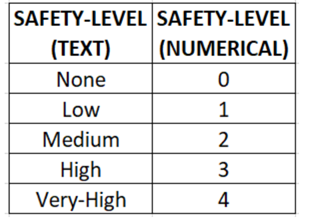

In [ ]:
from pycaret.datasets import get_data
employee = get_data('employee')



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [ ]:
from pycaret.classification import *
clf1 = setup(data = employee, target = 'left', ordinal_features = {'salary' : ['low', 'medium', 'high']})
clf1[0]

Setup Succesfully Completed!


,Description,Value
0,session_id,6141
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(14999, 10)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,6
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


,satisfaction_level,last_evaluation,average_montly_hours,salary,number_project_2,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_10,time_spend_company_2,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,Work_accident_0,Work_accident_1,promotion_last_5years_0,promotion_last_5years_1,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,157.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,262.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,272.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,223.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,159.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,151.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,160.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,143.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,280.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# One Hot Encoding

# What is  One Hot Encoding

It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.

Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Let’s consider the previous example of safety levels with one-hot encoding.

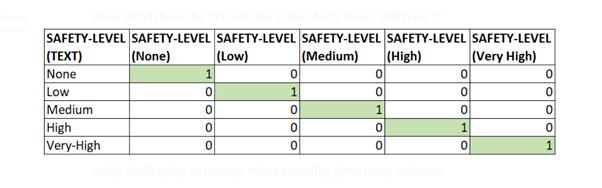



 PyCaret will transform all categorical features in dataset using one hot encoding. This is ideal for features having nominal categorical data i.e. data cannot be ordered. In other different scenarios other methods of encoding must be used. For example, when the data is ordinal i.e. data has intrinsic levels, ordinal encoding must be used. One Hot Encoding works on all features that are either inferred as categorical or are forced as categorical using categorical_features parameter within setup.


In [ ]:
# Importing dataset
from pycaret.datasets import get_data
pokemon = get_data('pokemon')
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = pokemon, target = 'Legendary')


Setup Succesfully Completed!


,Description,Value
0,session_id,300
1,Target Type,Binary
2,Label Encoded,"False: 0, True: 1"
3,Original Data,"(800, 13)"
4,Missing Values,True
5,Numeric Features,8
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
clf1[0]

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Name_Abomasnow,Name_AbomasnowMega Abomasnow,Name_Abra,Name_Absol,Name_AbsolMega Absol,Name_Accelgor,Name_AegislashBlade Forme,Name_AegislashShield Forme,Name_Aerodactyl,Name_AerodactylMega Aerodactyl,Name_Aggron,Name_AggronMega Aggron,Name_Aipom,Name_Alakazam,Name_AlakazamMega Alakazam,Name_Alomomola,Name_Altaria,Name_AltariaMega Altaria,Name_Amaura,Name_Ambipom,Name_Amoonguss,Name_Ampharos,Name_AmpharosMega Ampharos,Name_Anorith,Name_Arbok,Name_Arcanine,Name_Arceus,Name_Archen,Name_Archeops,Name_Ariados,Name_Armaldo,Name_Aromatisse,...,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Type 2_Bug,Type 2_Dark,Type 2_Dragon,Type 2_Electric,Type 2_Fairy,Type 2_Fighting,Type 2_Fire,Type 2_Flying,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Type 2_not_available,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,1.0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,625.0,80.0,100.0,123.0,122.0,120.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,309.0,39.0,52.0,43.0,60.0,50.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719.0,600.0,50.0,100.0,150.0,100.0,150.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
796,719.0,700.0,50.0,160.0,110.0,160.0,110.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
797,720.0,600.0,80.0,110.0,60.0,150.0,130.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# **Cardinal Encoding**
When categorical features in the dataset contain variables with many levels (also known as high cardinality features), then typical One Hot Encoding leads to creation of a very large number of new features, thereby making the experiment slow and introduces probable noise for certain machine learning algorithms. Features with high cardinality can be handled in PyCaret using high_cardinality_features parameter within setup. It supports two methods for cardinal encoding i.e. Frequency / Count Based and Clustering method. These methods can be defined in the high_cardinality_method parameter within setup.

# high_cardinality_features: string, default = None
When the data contains features with high cardinality, they can be compressed into fewer levels by passing them as a list of column names with high cardinality. Features are compressed using method defined in high_cardinality_method param.
# high_cardinality_method: string, default = ‘frequency’
When method set to ‘frequency’ it will replace the original value of feature with the frequency distribution and convert the feature into numeric. Other available method is ‘clustering’ which performs the clustering on statistical attribute of data and replaces the original value of feature with cluster label. The number of clusters is determined using a combination of Calinski-Harabasz and Silhouette criterion.


In [ ]:
# Importing dataset
from pycaret.datasets import get_data
income = get_data('income')
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = income, target = 'income >50K', high_cardinality_features = ['native-country'])

Setup Succesfully Completed!


,Description,Value
0,session_id,8724
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(32561, 14)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [ ]:
clf1[0]

,age,capital-gain,capital-loss,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_not_available,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,education-num_1,education-num_10,education-num_11,education-num_12,education-num_13,education-num_14,education-num_15,education-num_16,education-num_2,education-num_3,...,education-num_5,education-num_6,education-num_7,education-num_8,education-num_9,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_not_available,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39.0,2174.0,0.0,40.0,29170.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50.0,0.0,0.0,13.0,29170.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38.0,0.0,0.0,40.0,29170.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53.0,0.0,0.0,40.0,29170.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28.0,0.0,0.0,40.0,95.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,0.0,0.0,38.0,29170.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32557,40.0,0.0,0.0,40.0,29170.0,0.0,0.0,0

# Handle Unknown Levels

When the unseen data has new levels in categorical feature that were not present at the time of training the model, it may cause problems for trained algorithm in generating accurate predictions. One way to deal with such data points is to reassign them to known level of categorical features i.e. the levels known in the training dataset. This can be achieved in PyCaret using handle_unknown_categorical parameter which is set to True by default. It supports two methods ‘least_frequent’ and ‘most_frequent’ which can be controlled using unknown_categorical_method parameter within setup.


# Parameters in setup 

# handle_unknown_categorical: bool, default = True
When set to True, unknown categorical levels in new / unseen data are replaced by the most or least frequent level as learned in the training data. The method is defined under the unknown_categorical_method param.
# unknown_categorical_method: string, default = ‘least_frequent’
Method used to replace unknown categorical levels in unseen data. Method can be set to ‘least_frequent’ or ‘most_frequent’.


In [ ]:
# Importing dataset
from pycaret.datasets import get_data
insurance = get_data('insurance')

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Importing module and initializing setup
from pycaret.regression import *
reg1 = setup(data = insurance, target = 'charges', handle_unknown_categorical = True, unknown_categorical_method = 'most_frequent')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,8117
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
reg1[0]

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.850,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.800,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#	Fix Imbalance in Target Variable**

When dataset has unequal distribution of target class it can be fixed using fix_imbalance parameter. When set to True, SMOTE (Synthetic Minority Over-sampling Technique) is applied by default to create synthetic datapoints for minority class.  Method for resampling can be changed using fix_imbalance_method parameter within setup.
This is only available in pycaret.classification.


# Parameters in setup 

# fix_imbalance: bool, default = False
When dataset has unequal distribution of target class it can be fixed using fix_imbalance parameter. When set to True, SMOTE (Synthetic Minority Over-sampling Technique) is applied by default to create synthetic datapoints for minority class.
# fix_imbalance_method: obj, default = None
When fix_imbalance is set to True and fix_imbalance_method is None, ‘smote’ is applied by default to oversample minority class during cross validation. This parameter accepts any module from ‘imblearn’ that supports ‘fit_resample’ method.


In [ ]:
from pycaret.datasets import get_data
credit = get_data('credit')


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:

from pycaret.classification import *
clf1 = setup(data = credit, target = 'default', fix_imbalance = True)


Setup Succesfully Completed!


,Description,Value
0,session_id,6793
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(24000, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
clf1[0]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_-2,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_-2,...,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000.0,37.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000.0,34.0,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23996,150000.0,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23997,30000.0,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23998,80000.0,41.0,-1645.0,78379.0